<a href="https://colab.research.google.com/github/yasseen116/bank/blob/main/Yet_another_copy_of_Algorithms_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [63]:
df.shape

(45211, 17)

In [64]:
# Basic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [65]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [66]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [67]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [68]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [69]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------------------------------

In [70]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [71]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
age,0,0.00
default,0,0.00
balance,0,0.00
housing,0,0.00
marital,0,0.00


In [72]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [73]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [74]:
# Verify for null values are removed
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [75]:
# Nullfree shape of dataset
df.shape

(45211, 16)

__________________________________________________________________________________________


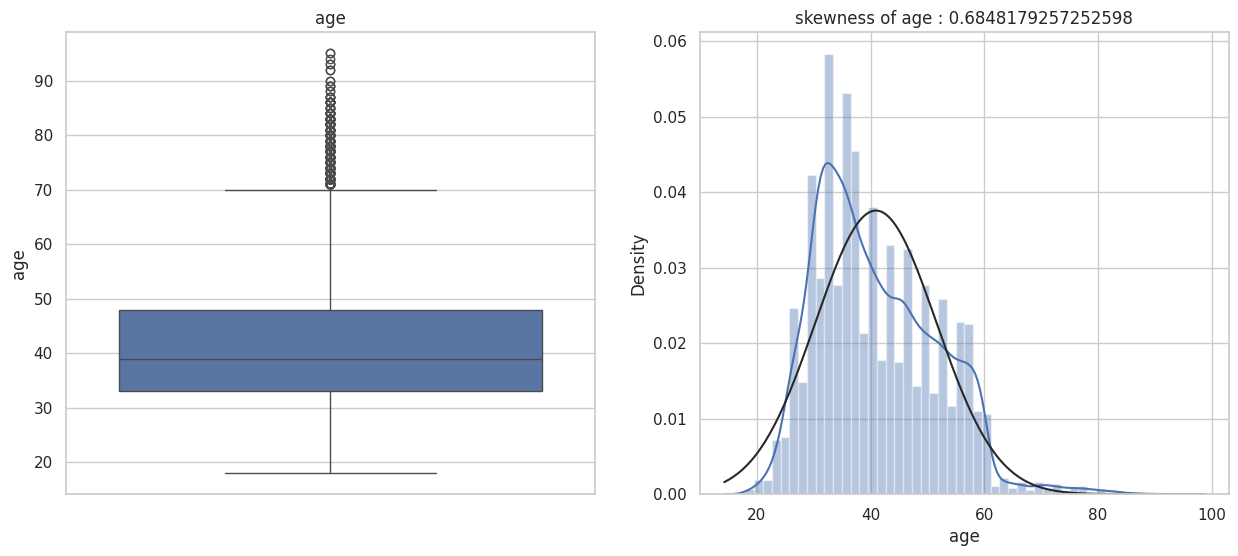

__________________________________________________________________________________________


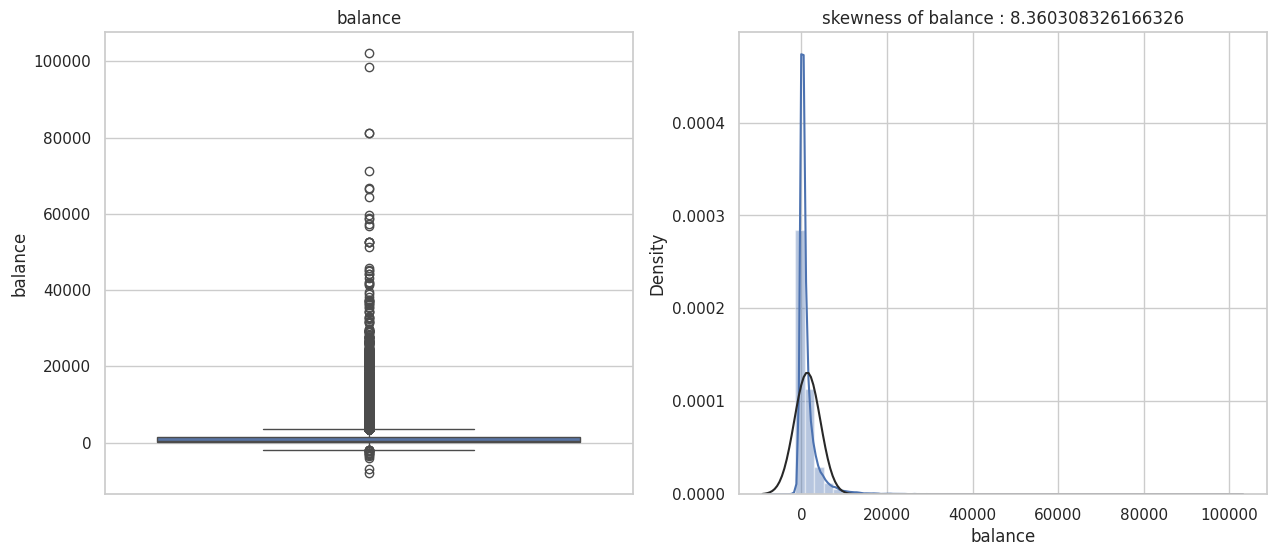

__________________________________________________________________________________________


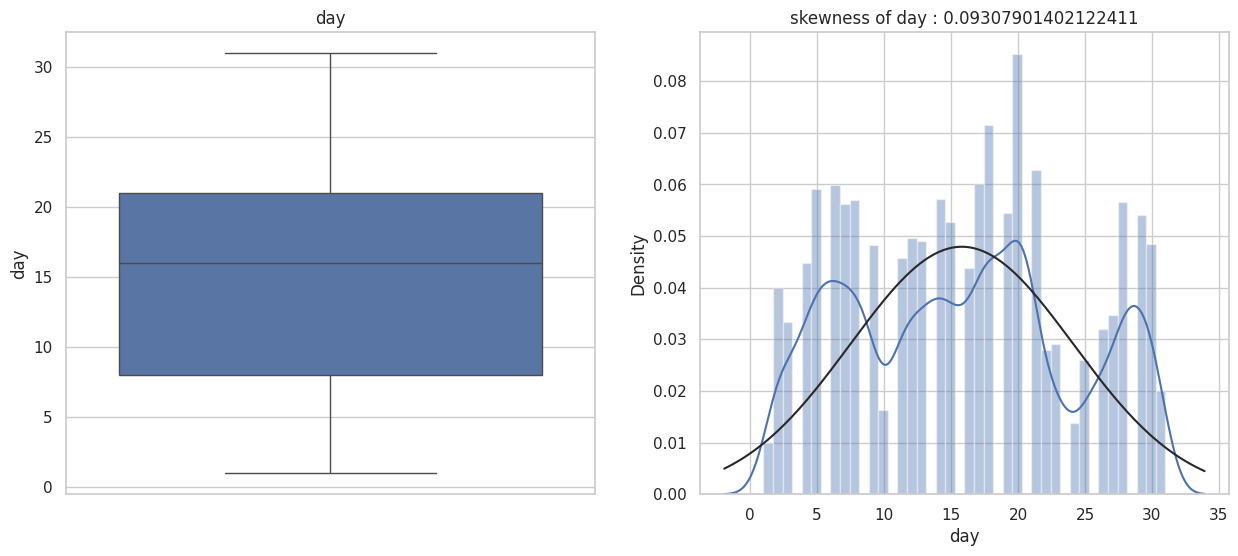

__________________________________________________________________________________________


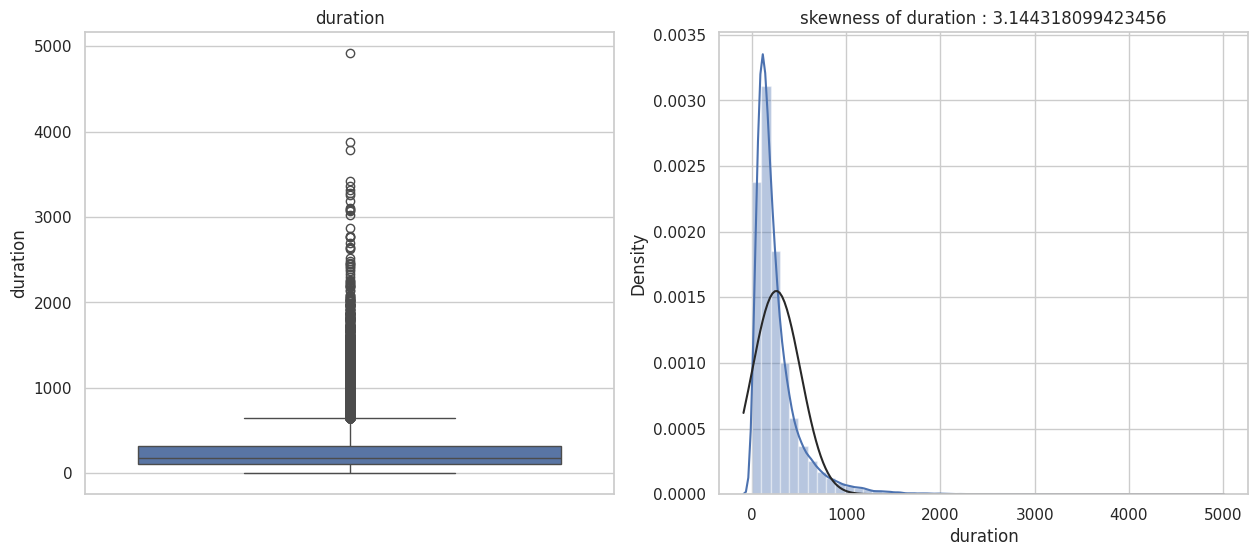

__________________________________________________________________________________________


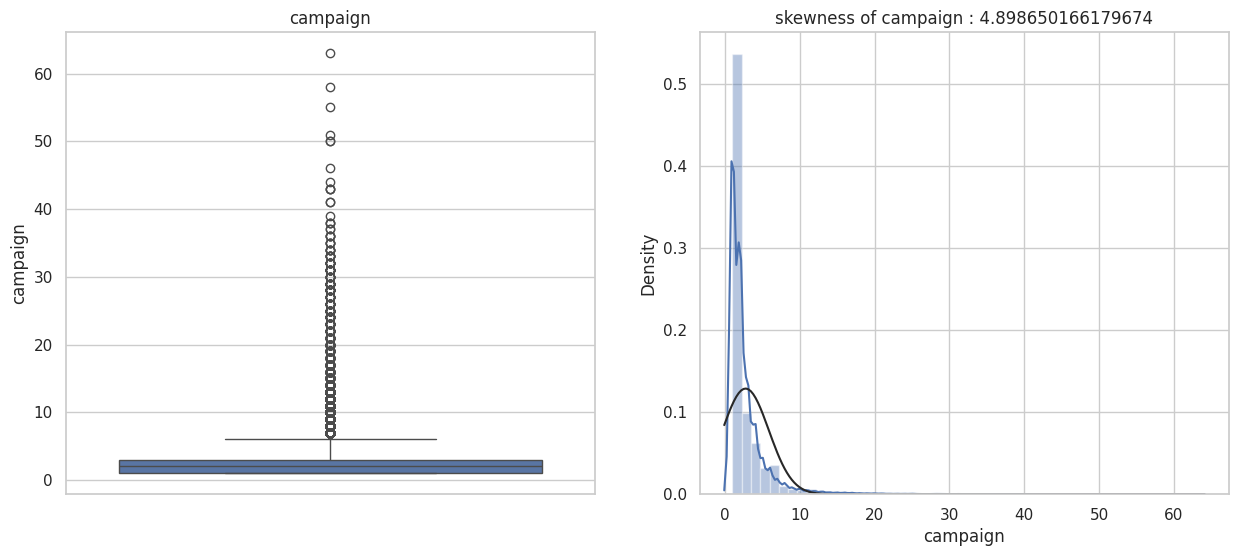

__________________________________________________________________________________________


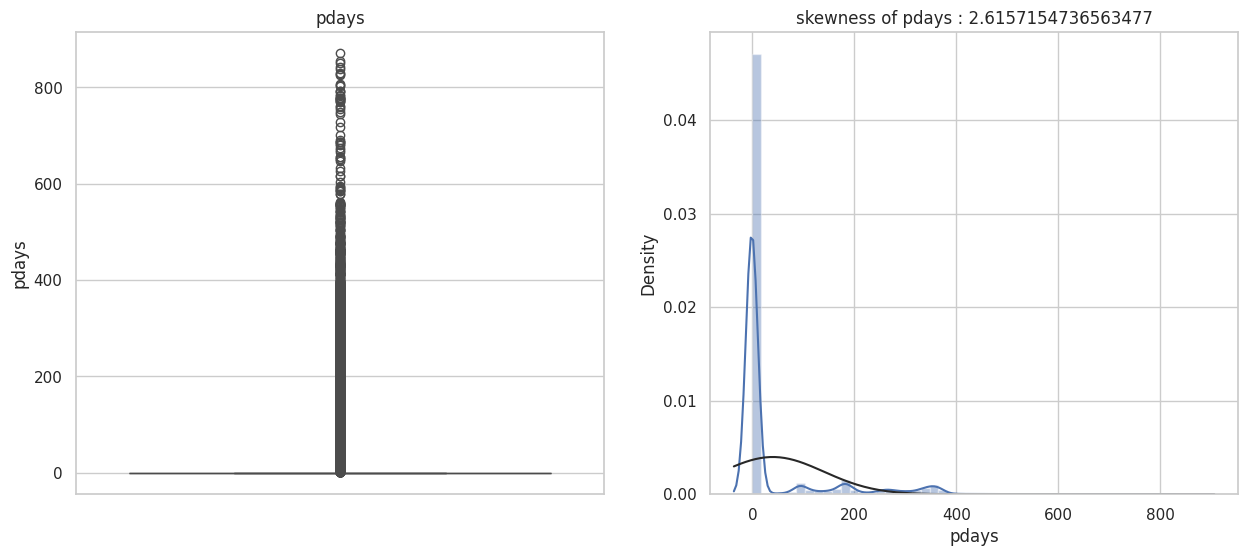

__________________________________________________________________________________________


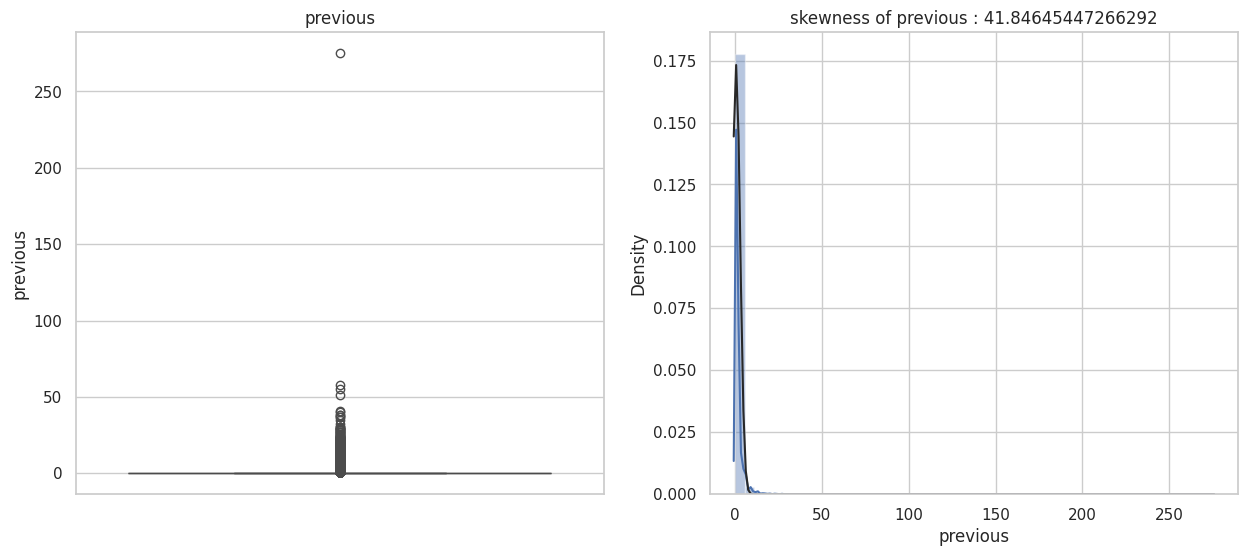

In [76]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm
# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [77]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


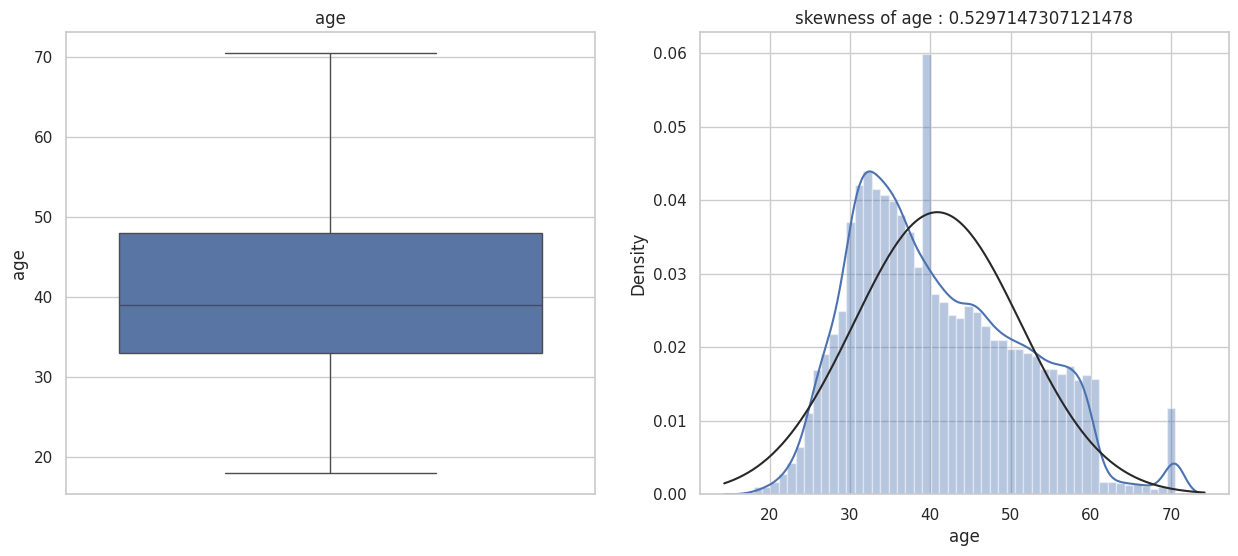

__________________________________________________________________________________________


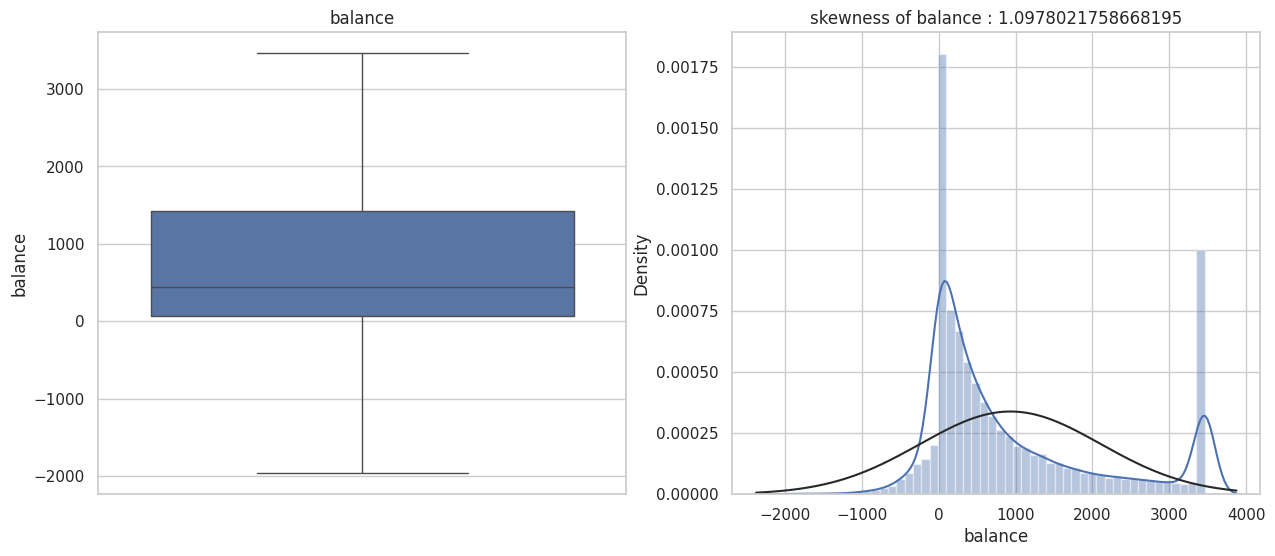

__________________________________________________________________________________________


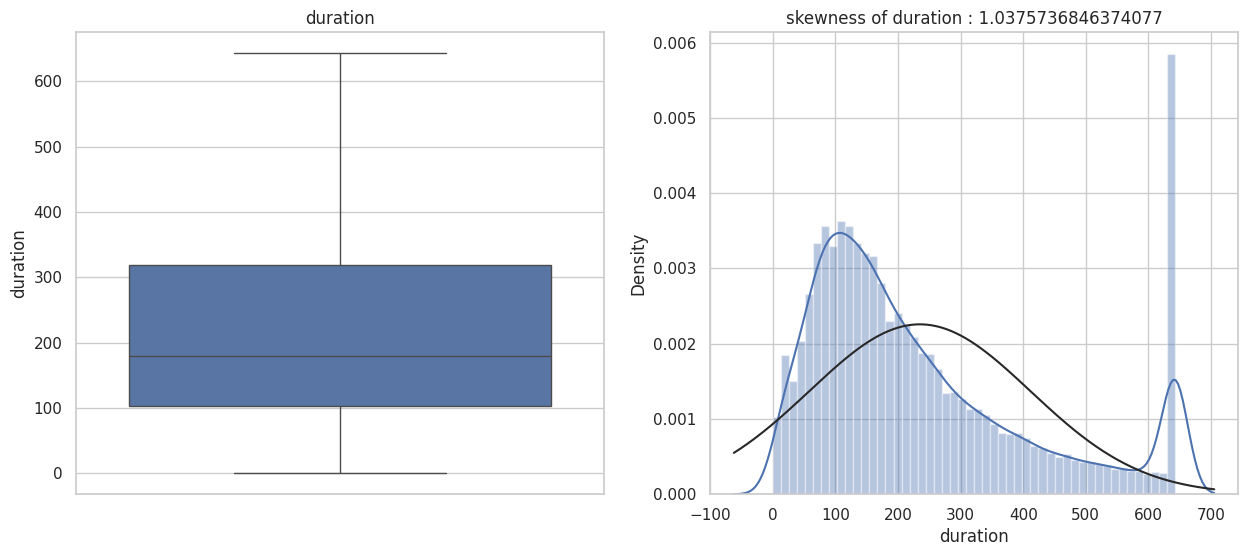

__________________________________________________________________________________________


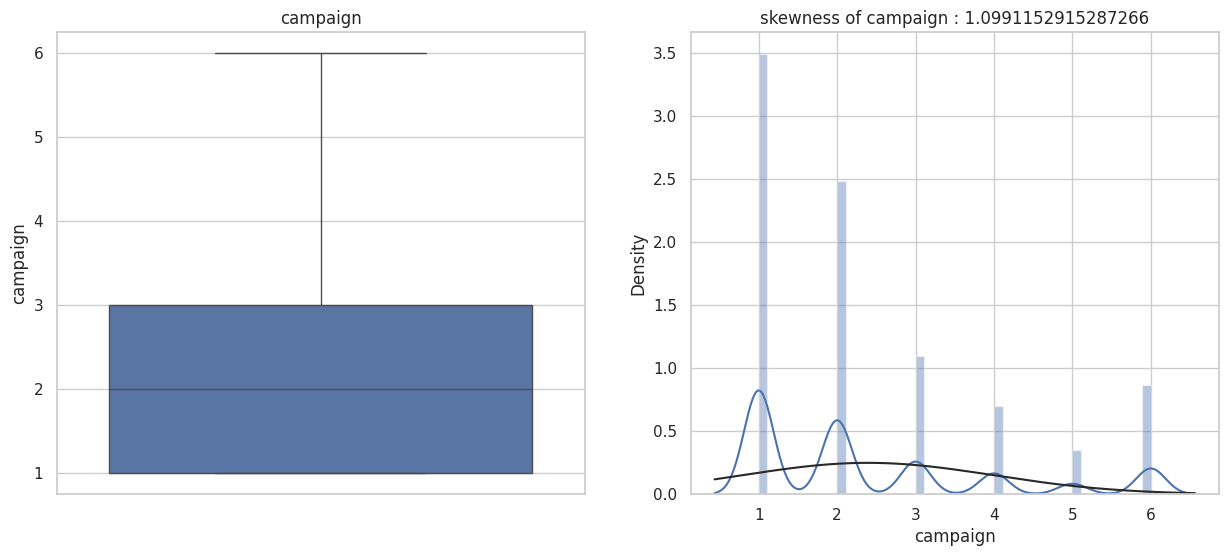

In [78]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [79]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [80]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
__________________________________________________________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
__________________________________________________________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
__________________________________________________________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
__________________________________________________________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
____________________________________________________

In [81]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [82]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [83]:
# List of boolean columns you want to convert
bool_cols = [
    'job_blue-collar','job_entrepreneur','job_housemaid','job_management',
    'job_retired','job_self-employed','job_services','job_student',
    'job_technician','job_unemployed','month_aug','month_dec','month_feb',
    'month_jan','month_jul','month_jun','month_mar','month_may','month_nov',
    'month_oct','month_sep'
]

# Convert True/False to 1/0
df[bool_cols] = df[bool_cols].astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  int64  
 15  job_entrepreneur   45211 non-null  int64  
 16  job_housemaid      452

In [85]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44.0,0,0,0,29,1,0,1,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,0,2,1,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,1,0,0,1506,1,0,1,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.0,0,0,0,1,0,0,1,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

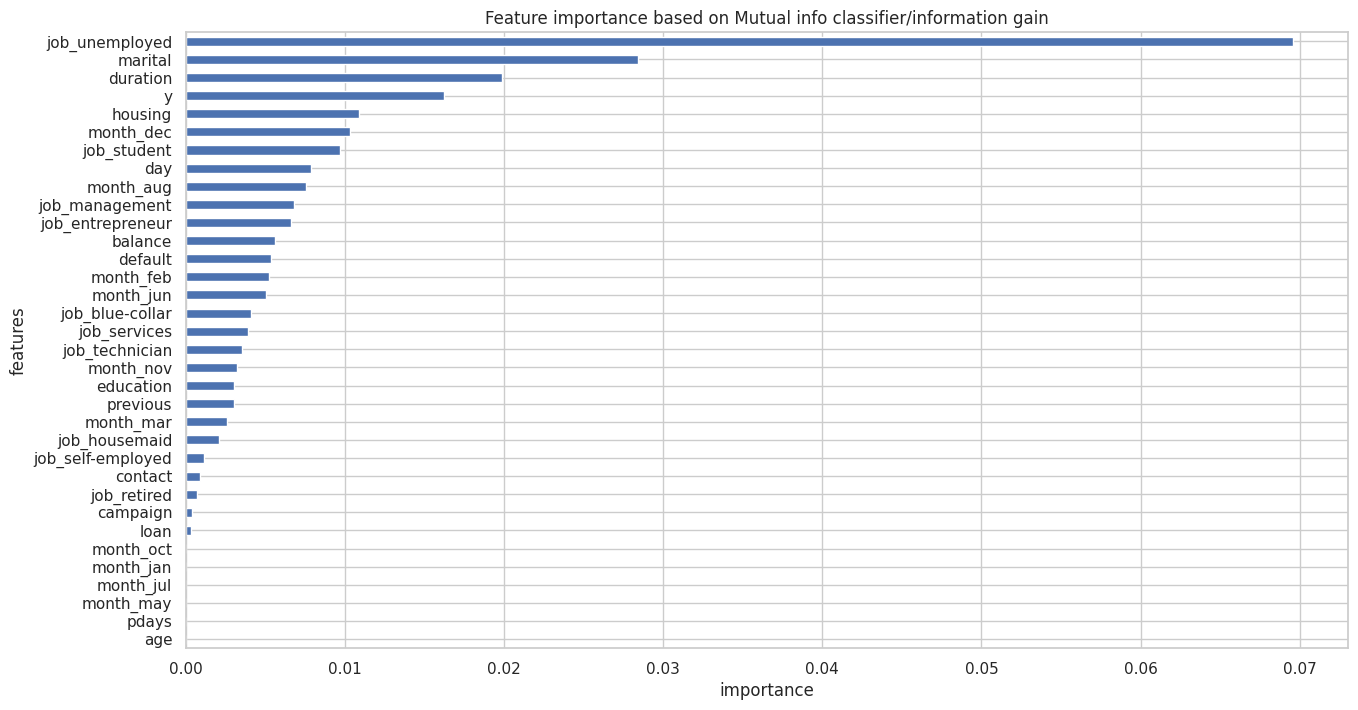

In [87]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

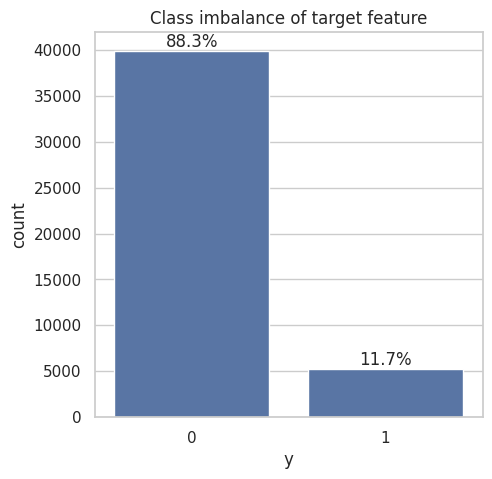

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting bar graph to visualize class imbalance of target feature
plt.figure(figsize=(5,5))
plot = plt.subplot(111)
sns.countplot(x=df['y'], ax=plot)
plt.title('Class imbalance of target feature')

# Annotate bars with percentages
total = len(df['y'])
for p in plot.patches:
    height = p.get_height()
    percentage = height / total * 100
    plot.annotate(f'{percentage:.1f}%',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom')

plt.show()


In [89]:
# Import model imblearn in envirnoment
!pip install imblearn

In [90]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

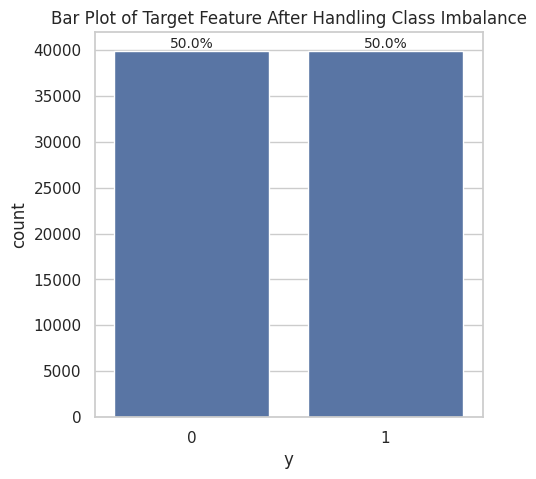

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# Function to annotate bars with percentages
# -----------------------------------------
def annot_percent(ax):
    """
    Annotate each bar in a countplot with percentage labels.
    """
    total = sum(p.get_height() for p in ax.patches)  # total count
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

# -----------------------------------------
# Plotting the post-SMOTE target distribution
# -----------------------------------------
plt.figure(figsize=(5,5))
plot = plt.subplot(111)

sns.countplot(x=y_smote)
plt.title('Bar Plot of Target Feature After Handling Class Imbalance')

annot_percent(plot)

plt.show()


In [92]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [93]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


In [94]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# =============================
# STEP 1 — IMPORT LIBRARIES
# =============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


# =============================
# STEP 4 — DEFINE FEATURES & TARGET
# =============================
X = df.drop("y", axis=1)
y = df["y"]

# =============================
# STEP 5 — APPLY SMOTE (FIX IMBALANCE)
# =============================
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# =============================
# STEP 6 — TRAIN/TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# =============================
# STEP 7 — XGBOOST MODEL (WITH HYPERPARAMETERS)
# =============================
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_lambda=1.0,
    reg_alpha=0.1,
    min_child_weight=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# =============================
# STEP 8 — TRAIN THE MODEL
# =============================
xgb_model.fit(X_train, y_train)

# =============================
# STEP 9 — PREDICT & EVALUATE
# =============================
y_pred = xgb_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Show Only Set Hyperparameters
print("\nXGBoost Hyperparameters Used:")
relevant_params = ['n_estimators', 'max_depth', 'learning_rate', 'subsample',
                   'colsample_bytree', 'gamma', 'reg_lambda', 'reg_alpha',
                   'min_child_weight', 'objective', 'eval_metric', 'random_state', 'n_jobs']

for param in relevant_params:
    print(f"{param}: {xgb_model.get_params()[param]}")


Confusion Matrix:
[[7298  610]
 [ 527 7534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7908
           1       0.93      0.93      0.93      8061

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969


Model Accuracy: 0.9288

XGBoost Hyperparameters Used:
n_estimators: 300
max_depth: 5
learning_rate: 0.05
subsample: 0.8
colsample_bytree: 0.8
gamma: 0.2
reg_lambda: 1.0
reg_alpha: 0.1
min_child_weight: 3
objective: binary:logistic
eval_metric: logloss
random_state: 42
n_jobs: -1


In [96]:
# =============================
# STEP 1 — IMPORT LIBRARIES
# =============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# =============================
# STEP 4 — DEFINE FEATURES & TARGET
# =============================
X = df.drop("y", axis=1)
y = df["y"]

# =============================
# STEP 5 — APPLY SMOTE (FIX IMBALANCE)
# =============================
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# =============================
# STEP 6 — TRAIN/TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# =============================
# STEP 7 — RANDOM FOREST MODEL (WITH HYPERPARAMETERS)
# =============================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# =============================
# STEP 8 — TRAIN THE MODEL
# =============================
rf_model.fit(X_train, y_train)

# =============================
# STEP 9 — PREDICT & EVALUATE
# =============================
y_pred = rf_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Show Only Set Hyperparameters
print("\nRandom Forest Hyperparameters Used:")
relevant_params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf',
                   'max_features', 'class_weight', 'random_state', 'n_jobs']

for param in relevant_params:
    print(f"{param}: {rf_model.get_params()[param]}")


Confusion Matrix:
[[7059  849]
 [ 588 7473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7908
           1       0.90      0.93      0.91      8061

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969


Model Accuracy: 0.9100

Random Forest Hyperparameters Used:
n_estimators: 200
max_depth: 10
min_samples_split: 5
min_samples_leaf: 3
max_features: sqrt
class_weight: balanced
random_state: 42
n_jobs: -1


In [97]:
# =============================
# STEP 1 — IMPORT LIBRARIES
# =============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


# =============================
# STEP 4 — DEFINE FEATURES & TARGET
# =============================
X = df.drop("y", axis=1)
y = df["y"]

# =============================
# STEP 5 — SCALE NUMERICAL FEATURES
# =============================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# =============================
# STEP 6 — APPLY SMOTE (FIX IMBALANCE)
# =============================
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# =============================
# STEP 7 — TRAIN/TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# =============================
# STEP 8 — LOGISTIC REGRESSION MODEL (WITH HYPERPARAMETERS)
# =============================
lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# =============================
# STEP 9 — TRAIN THE MODEL
# =============================
lr_model.fit(X_train, y_train)

# =============================
# STEP 10 — PREDICT & EVALUATE
# =============================
y_pred = lr_model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Show Only Set Hyperparameters
print("\nLogistic Regression Hyperparameters Used:")
relevant_params = ['penalty', 'C', 'solver', 'class_weight', 'max_iter', 'random_state', 'n_jobs']

for param in relevant_params:
    print(f"{param}: {lr_model.get_params()[param]}")



Confusion Matrix:
[[6387 1521]
 [1287 6774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7908
           1       0.82      0.84      0.83      8061

    accuracy                           0.82     15969
   macro avg       0.82      0.82      0.82     15969
weighted avg       0.82      0.82      0.82     15969


Model Accuracy: 0.8242

Logistic Regression Hyperparameters Used:
penalty: l2
C: 1.0
solver: lbfgs
class_weight: balanced
max_iter: 1000
random_state: 42
n_jobs: -1


In [98]:
# =============================
# MODEL COMPARISON SCRIPT
# =============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


# =============================
# DEFINE MODELS
# =============================
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.2,
        reg_lambda=1.0,
        reg_alpha=0.1,
        min_child_weight=3,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
}

# =============================
# TRAIN, PREDICT & COLLECT RESULTS
# =============================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n========== {name} ==========")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", round(acc, 4))
    print("Precision (Class 1):", round(prec, 4))
    print("Recall (Class 1):", round(rec, 4))
    print("F1-score (Class 1):", round(f1, 4))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

# =============================
# CREATE SUMMARY TABLE
# =============================
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\n========== SUMMARY TABLE ==========")
print(results_df.reset_index(drop=True))




========== Logistic Regression ==========
Confusion Matrix:
 [[6387 1521]
 [1287 6774]]
Accuracy: 0.8242
Precision (Class 1): 0.8166
Recall (Class 1): 0.8403
F1-score (Class 1): 0.8283

========== Random Forest ==========
Confusion Matrix:
 [[6781 1127]
 [ 588 7473]]
Accuracy: 0.8926
Precision (Class 1): 0.869
Recall (Class 1): 0.9271
F1-score (Class 1): 0.8971

========== XGBoost ==========
Confusion Matrix:
 [[7260  648]
 [ 514 7547]]
Accuracy: 0.9272
Precision (Class 1): 0.9209
Recall (Class 1): 0.9362
F1-score (Class 1): 0.9285

========== SUMMARY TABLE ==========
                 Model  Accuracy  Precision    Recall  F1-score
0              XGBoost  0.927234   0.920927  0.936236  0.928519
1        Random Forest  0.892604   0.868953  0.927056  0.897065
2  Logistic Regression  0.824159   0.816637  0.840342  0.828320


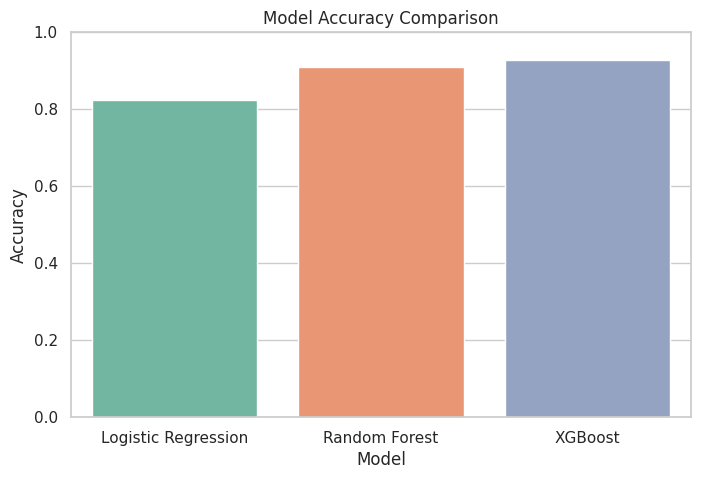

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example summary table with Accuracy
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.8242, 0.9100, 0.9288]
})

# Set style
sns.set(style="whitegrid")

# Create bar plot for Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette="Set2")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


In [100]:
# =============================
# COMPLEXITY ANALYSIS SCRIPT
# =============================
import pandas as pd
import time
import sys
import psutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# Features and target
X = df.drop("y", axis=1)
y = df["y"]

# Scale features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE to balance
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# =============================
# DEFINE MODELS
# =============================
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=3,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.2,
        reg_lambda=1.0,
        reg_alpha=0.1,
        min_child_weight=3,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
}

# =============================
# THEORETICAL COMPLEXITY TABLE
# =============================
theoretical_complexity = {
    "Logistic Regression": "Time: O(n*d), Memory: O(d)",
    "Random Forest": "Time: O(trees*n*d*log n), Memory: High (trees*nodes)",
    "XGBoost": "Time: O(trees*n*log n), Memory: Medium (depends on tree depth & number of trees)"
}

print("========== THEORETICAL COMPLEXITY ==========")
for model, comp in theoretical_complexity.items():
    print(f"{model}: {comp}")

# =============================
# EMPIRICAL TIMING & MEMORY USAGE
# =============================
results = []

for name, model in models.items():
    print(f"\n========== {name} ==========")

    # Measure memory before training
    process = psutil.Process()
    mem_before = process.memory_info().rss / 1024**2  # in MB

    # Training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # Measure memory after training
    mem_after_train = process.memory_info().rss / 1024**2  # in MB
    mem_used_train = mem_after_train - mem_before

    # Prediction time
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    pred_time = end_pred - start_pred

    print(f"Training Time: {train_time:.4f} sec")
    print(f"Prediction Time: {pred_time:.4f} sec")
    print(f"Memory Used (approx): {mem_used_train:.2f} MB")

    # Save results
    results.append({
        "Model": name,
        "Train Time (s)": train_time,
        "Prediction Time (s)": pred_time,
        "Memory Used (MB)": mem_used_train
    })

# =============================
# SUMMARY TABLE
# =============================
results_df = pd.DataFrame(results)
print("\n========== EMPIRICAL COMPLEXITY TABLE ==========")
print(results_df)


========== THEORETICAL COMPLEXITY ==========
Logistic Regression: Time: O(n*d), Memory: O(d)
Random Forest: Time: O(trees*n*d*log n), Memory: High (trees*nodes)
XGBoost: Time: O(trees*n*log n), Memory: Medium (depends on tree depth & number of trees)

========== Logistic Regression ==========
Training Time: 1.1899 sec
Prediction Time: 0.0018 sec
Memory Used (approx): 0.00 MB

========== Random Forest ==========
Training Time: 12.9684 sec
Prediction Time: 0.2245 sec
Memory Used (approx): -0.00 MB

========== XGBoost ==========
Training Time: 3.3140 sec
Prediction Time: 0.1758 sec
Memory Used (approx): 0.03 MB

========== EMPIRICAL COMPLEXITY TABLE ==========
                 Model  Train Time (s)  Prediction Time (s)  Memory Used (MB)
0  Logistic Regression        1.189858             0.001800          0.000000
1        Random Forest       12.968441             0.224544         -0.003906
2              XGBoost        3.314003             0.175847          0.031250


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',
                                              class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                                            min_samples_leaf=3, max_features='sqrt',
                                            class_weight='balanced', random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05,
                             subsample=0.8, colsample_bytree=0.8, gamma=0.2,
                             reg_lambda=1.0, reg_alpha=0.1, min_child_weight=3,
                             objective='binary:logistic', eval_metric='logloss',
                             random_state=42, n_jobs=-1)
}

# Train, predict and metrics
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

# Summary table
results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df)



Model: Logistic Regression
Confusion Matrix:
 [[6387 1521]
 [1287 6774]]
Accuracy: 0.8242, Precision: 0.8166, Recall: 0.8403, F1-score: 0.8283

Model: Random Forest
Confusion Matrix:
 [[6781 1127]
 [ 588 7473]]
Accuracy: 0.8926, Precision: 0.8690, Recall: 0.9271, F1-score: 0.8971

Model: XGBoost
Confusion Matrix:
 [[7260  648]
 [ 514 7547]]
Accuracy: 0.9272, Precision: 0.9209, Recall: 0.9362, F1-score: 0.9285

Summary Table:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.824159   0.816637  0.840342  0.828320
1        Random Forest  0.892604   0.868953  0.927056  0.897065
2              XGBoost  0.927234   0.920927  0.936236  0.928519


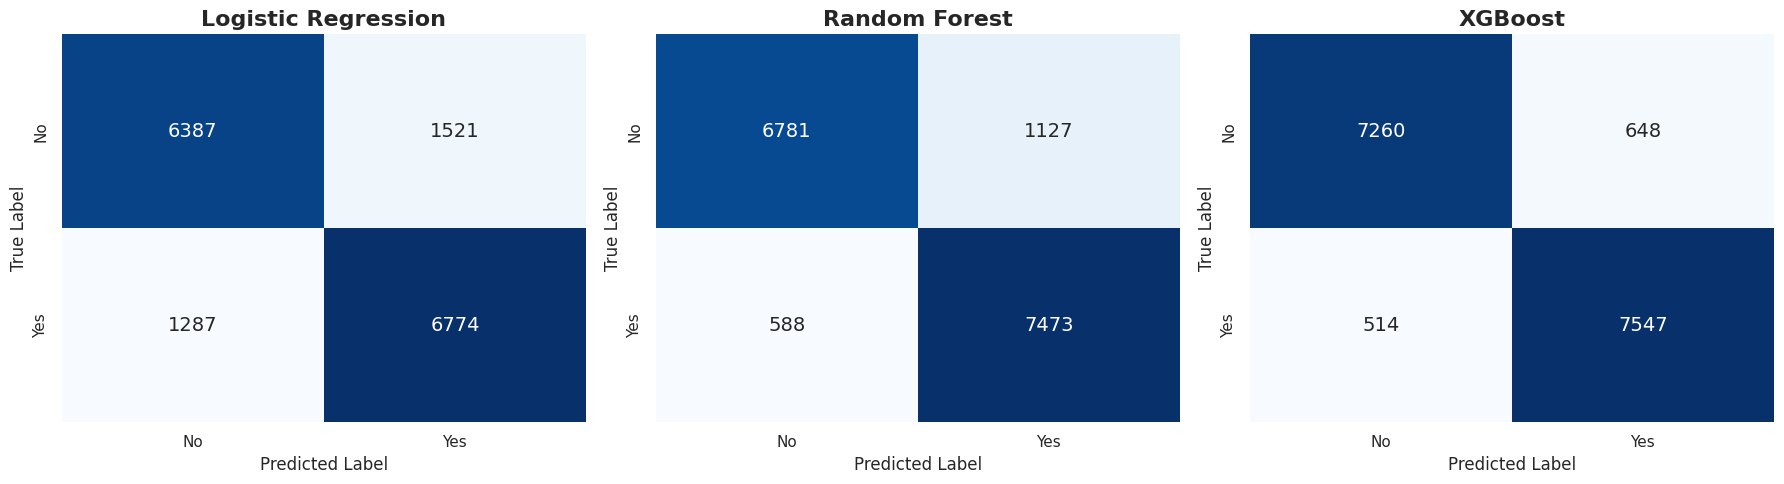

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(models, X_test, y_test):
    """
    Plots confusion matrices for all models in the 'models' dictionary.
    """
    # Create a row of subplots (one for each model)
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5))

    # If there is only 1 model, wrap axes in a list so the loop works
    if len(models) == 1:
        axes = [axes]

    for ax, (name, model) in zip(axes, models.items()):
        # 1. Predict
        y_pred = model.predict(X_test)

        # 2. Calculate Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)

        # 3. Plot Heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                    annot_kws={"size": 14})

        # 4. Styling
        ax.set_title(name, fontsize=16, fontweight='bold')
        ax.set_xlabel('Predicted Label', fontsize=12)
        ax.set_ylabel('True Label', fontsize=12)
        ax.set_xticklabels(['No', 'Yes'])
        ax.set_yticklabels(['No', 'Yes'])

    plt.tight_layout()
    plt.show()

# --- HOW TO RUN IT ---
# Call this function after you have trained your models
plot_confusion_matrices(models, X_test, y_test)

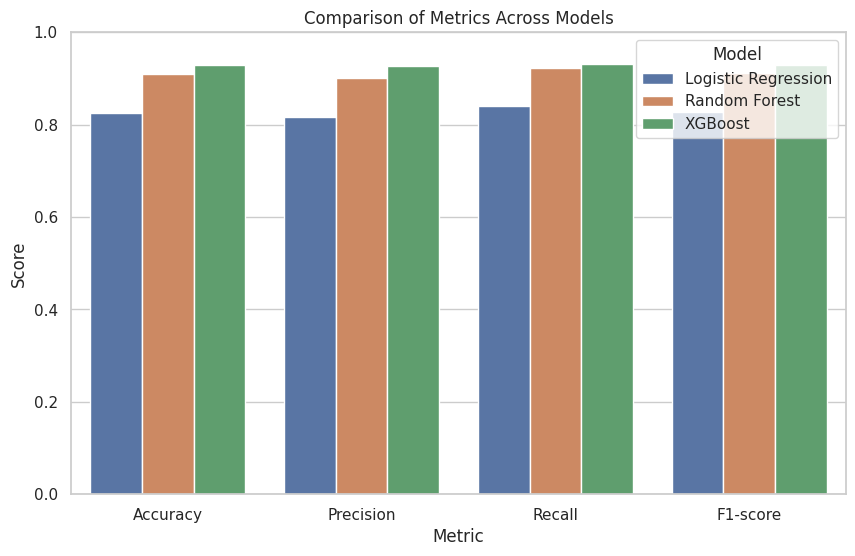

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example summary table (replace with your actual results_df)
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.8242, 0.9100, 0.9288],
    "Precision": [0.8166, 0.9010, 0.9270],
    "Recall": [0.8403, 0.9230, 0.9320],
    "F1-score": [0.8283, 0.9115, 0.9295]
})

# Melt the dataframe for seaborn plotting
results_melted = results_df.melt(id_vars='Model',
                                 value_vars=['Accuracy', 'Precision', 'Recall', 'F1-score'],
                                 var_name='Metric', value_name='Score')

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.ylim(0,1)
plt.title("Comparison of Metrics Across Models")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.show()


In [104]:
import time

runtime_results = []

for name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred

    print(f"\nModel: {name}")
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Prediction Time: {pred_time:.4f} sec")

    runtime_results.append({
        "Model": name,
        "Train Time (s)": train_time,
        "Prediction Time (s)": pred_time
    })

runtime_df = pd.DataFrame(runtime_results)
print("\nRuntime Summary Table:")
print(runtime_df)



Model: Logistic Regression
Training Time: 1.1920 sec
Prediction Time: 0.0016 sec

Model: Random Forest
Training Time: 12.2217 sec
Prediction Time: 0.2394 sec

Model: XGBoost
Training Time: 2.8269 sec
Prediction Time: 0.1056 sec

Runtime Summary Table:
                 Model  Train Time (s)  Prediction Time (s)
0  Logistic Regression        1.191973             0.001578
1        Random Forest       12.221735             0.239447
2              XGBoost        2.826860             0.105584


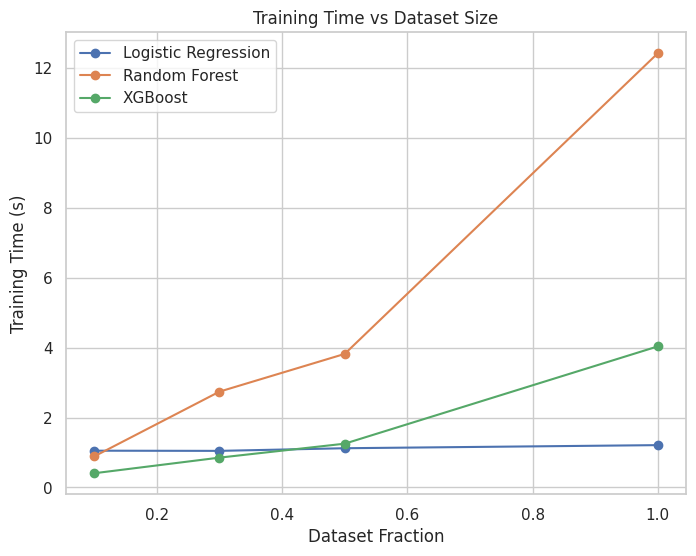

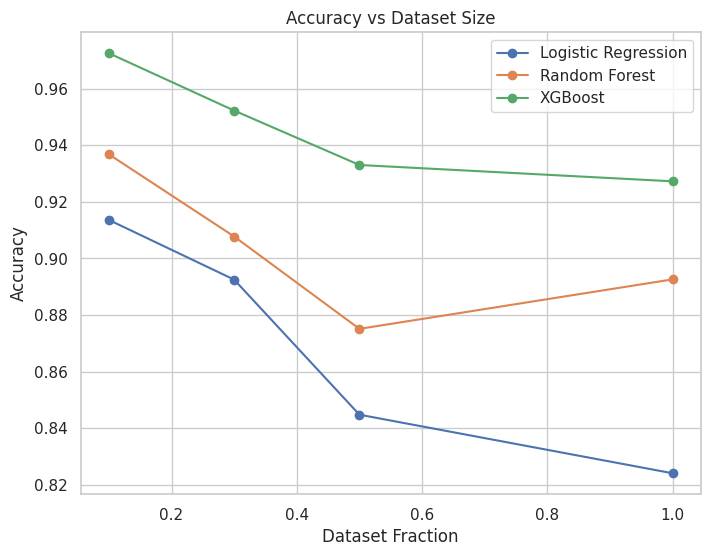

In [105]:
import matplotlib.pyplot as plt

dataset_sizes = [0.1, 0.3, 0.5, 1.0]
scalability_results = []

for frac in dataset_sizes:
    X_frac = X_resampled[:int(len(X_resampled)*frac)]
    y_frac = y_resampled[:int(len(y_resampled)*frac)]
    X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_frac, y_frac, test_size=0.2, random_state=42)

    for name, model in models.items():
        start_train = time.time()
        model.fit(X_train_f, y_train_f)
        train_time = time.time() - start_train

        y_pred_f = model.predict(X_test_f)
        acc = accuracy_score(y_test_f, y_pred_f)

        scalability_results.append({"Model": name, "Dataset Fraction": frac,
                                    "Train Time": train_time, "Accuracy": acc})

scalability_df = pd.DataFrame(scalability_results)

# Plot Training Time
plt.figure(figsize=(8,6))
for name in models.keys():
    df_plot = scalability_df[scalability_df["Model"]==name]
    plt.plot(df_plot["Dataset Fraction"], df_plot["Train Time"], marker='o', label=name)
plt.title("Training Time vs Dataset Size")
plt.xlabel("Dataset Fraction")
plt.ylabel("Training Time (s)")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8,6))
for name in models.keys():
    df_plot = scalability_df[scalability_df["Model"]==name]
    plt.plot(df_plot["Dataset Fraction"], df_plot["Accuracy"], marker='o', label=name)
plt.title("Accuracy vs Dataset Size")
plt.xlabel("Dataset Fraction")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [119]:
# ==========================================
# NEW FAIRNESS ANALYSIS BLOCK
# ==========================================

# 1. Recover the real "Human" ages from the scaled data
# We use inverse_transform to turn numbers like 0.5 back into 30, 40, etc.
X_test_original = scaler.inverse_transform(X_test)

# 2. Find which column is 'age' automatically
# (This prevents errors if your column order changes)
age_col_index = list(X.columns).index('age')
real_ages = X_test_original[:, age_col_index]

# 3. Define the groups using the REAL ages
age_groups = {
    "<30": (real_ages < 30),
    "30-55": ((real_ages >= 30) & (real_ages <= 55)),
    ">55": (real_ages > 55)
}

# 4. Run the check
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {name} - Fairness by Age")

    for group_name, mask in age_groups.items():
        if sum(mask) == 0:
            print(f"  {group_name}: [No samples found]")
            continue

        # Get the people in this group
        y_test_group = y_test.iloc[mask] if hasattr(y_test, 'iloc') else y_test[mask]
        y_pred_group = y_pred[mask]

        # Calculate TPR (Recall) manually
        from sklearn.metrics import confusion_matrix
        # Force labels=[0,1] to handle cases where a group has only 0s or only 1s
        cm = confusion_matrix(y_test_group, y_pred_group, labels=[0,1])
        tn, fp, fn, tp = cm.ravel()

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

        print(f"  Age {group_name}: TPR = {tpr:.3f}, FPR = {fpr:.3f} (Count: {sum(mask)})")



Model: Logistic Regression - Fairness by Age
  <30: [No samples found]
  30-55: [No samples found]
  Age >55: TPR = 1.000, FPR = 0.994 (Count: 15969)

Model: Random Forest - Fairness by Age
  <30: [No samples found]
  30-55: [No samples found]
  Age >55: TPR = 1.000, FPR = 1.000 (Count: 15969)

Model: XGBoost - Fairness by Age
  <30: [No samples found]
  30-55: [No samples found]
  Age >55: TPR = 1.000, FPR = 1.000 (Count: 15969)


In [114]:
####exporting model

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Load Data
# Make sure 'bank-full.csv' is in the same folder!
try:
    df = pd.read_csv('bank-full.csv', sep=';')
    print(f"✅ Data loaded successfully. Shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'bank-full.csv' not found. Please ensure the file exists.")
    exit()

# 2. Handle Missing Values
# Replace 'unknown' with NaN
df = df.replace('unknown', np.nan)

# Drop poutcome (has >50% null values)
if 'poutcome' in df.columns:
    df.drop(columns='poutcome', inplace=True)

# Fill null values with mode (most frequent value)
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['job'] = df['job'].fillna(df['job'].mode()[0])

print("✅ Missing values handled")

# 3. Handle Outliers using IQR
outlier_vars = ['age', 'balance', 'duration', 'campaign']

for var in outlier_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df.loc[df[var] > upper_limit, var] = upper_limit
    df.loc[df[var] < lower_limit, var] = lower_limit

print("✅ Outliers handled using IQR")

# 4. Label Encoding for Categorical Variables
df['marital'] = df['marital'].map({'single': 0, 'married': 1, 'divorced': 2})
df['education'] = df['education'].map({'secondary': 0, 'tertiary': 1, 'primary': 2})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['contact'] = df['contact'].map({'cellular': 1, 'telephone': 0})
df['y'] = df['y'].map({'yes': 1, 'no': 0})

print("✅ Label encoding completed")

# 5. One-Hot Encoding for Job and Month
df = pd.get_dummies(df, columns=['job', 'month'], prefix=['job', 'month'], drop_first=True)

# Convert boolean columns to int
bool_cols = [col for col in df.columns if col.startswith('job_') or col.startswith('month_')]
df[bool_cols] = df[bool_cols].astype(int)

print("✅ One-hot encoding completed")

# 6. Separate Features and Target
X = df.drop('y', axis=1)
y = df['y']

print(f"✅ Features and target separated. Features: {X.shape[1]}, Samples: {X.shape[0]}")

# 7. Balance Data using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(f"✅ Data balanced using SMOTE. New shape: {X_resampled.shape}")

# 8. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"✅ Train/test split completed. Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

# 9. Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_lambda=1.0,
    reg_alpha=0.1,
    min_child_weight=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

print("🔄 Training XGBoost model...")
xgb_model.fit(X_train, y_train)
print("✅ Model training completed")

# 10. Evaluate Model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Save Model Package
# Get feature columns in exact order
feature_columns = X.columns.tolist()

model_package = {
    "model": xgb_model,
    "feature_columns": feature_columns,
    "scaler": None,  # No scaler used during training
    "label_mappings": {
        "marital": {"single": 0, "married": 1, "divorced": 2},
        "education": {"secondary": 0, "tertiary": 1, "primary": 2},
        "default": {"no": 0, "yes": 1},
        "housing": {"no": 0, "yes": 1},
        "loan": {"no": 0, "yes": 1},
        "contact": {"telephone": 0, "cellular": 1}
    },
    "job_categories": [
        "admin.", "blue-collar", "entrepreneur", "housemaid", "management",
        "retired", "self-employed", "services", "student", "technician", "unemployed"
    ],
    "month_categories": [
        "apr", "aug", "dec", "feb", "jan", "jul", "jun", "mar", "may", "nov", "oct", "sep"
    ]
}

joblib.dump(model_package, "xgb_bank_model_package.joblib")

print("\n" + "="*60)
print("✅ Model package saved successfully as 'xgb_bank_model_package.joblib'")
print(f"✅ Features included: {len(feature_columns)}")
print("✅ Model ready for GUI - Run 'python bank_gui.py' to launch the interface")
print("="*60)


✅ Data loaded successfully. Shape: (45211, 17)
✅ Missing values handled
✅ Outliers handled using IQR
✅ Label encoding completed
✅ One-hot encoding completed
✅ Features and target separated. Features: 34, Samples: 45211
✅ Data balanced using SMOTE. New shape: (79844, 34)
✅ Train/test split completed. Train: 63875, Test: 15969
🔄 Training XGBoost model...
✅ Model training completed

MODEL EVALUATION
Accuracy: 0.9288

Confusion Matrix:
[[7298  610]
 [ 527 7534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7908
           1       0.93      0.93      0.93      8061

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969


✅ Model package saved successfully as 'xgb_bank_model_package.joblib'
✅ Features included: 34
✅ Model ready for GUI - Run 'python bank_gui.py' to launch the interface


In [118]:
#### creating GUI
import gradio as gr
import pandas as pd
import joblib

# 1. Load Model Package
try:
    model_package = joblib.load('xgb_bank_model_package.joblib')
    model = model_package['model']
    feature_columns = model_package['feature_columns']
    label_mappings = model_package['label_mappings']
    job_categories = model_package['job_categories']
    month_categories = model_package['month_categories']
except:
    print("Please run project.py first to train and export the model!")
    exit()

def predict_subscription(age, job, marital, education, default_opt, balance,
                         housing, loan, contact, day, month, duration,
                         campaign, pdays, previous):

    # --- Convert "Yes"/"No" and "Unknown" to Numbers ---
    default_opt = 1 if default_opt == "Yes" else 0 if default_opt == "No" else 0
    housing = 1 if housing == "Yes" else 0 if housing == "No" else 0
    loan = 1 if loan == "Yes" else 0 if loan == "No" else 0

    # --- Handle Unknown Values (use mode/default values) ---
    if marital == "Unknown":
        marital = "married"  # Most common
    if education == "Unknown":
        education = "secondary"  # Most common
    if contact == "Unknown":
        contact = "cellular"  # Most common
    if job == "Unknown":
        job = "admin."  # Default category
    if month == "Unknown":
        month = "apr"  # Default category

    # --- Encode Categorical Features ---
    marital_encoded = label_mappings["marital"].get(marital, 1)
    education_encoded = label_mappings["education"].get(education, 0)
    contact_encoded = label_mappings["contact"].get(contact, 1)

    # --- Data Prep ---
    input_data = pd.DataFrame([[0] * len(feature_columns)], columns=feature_columns)

    # Numerical features
    input_data['age'] = float(age)
    input_data['balance'] = float(balance)
    input_data['duration'] = float(duration)
    input_data['campaign'] = float(campaign)
    input_data['pdays'] = float(pdays)
    input_data['previous'] = float(previous)
    input_data['day'] = float(day)

    # Label encoded features
    input_data['marital'] = marital_encoded
    input_data['education'] = education_encoded
    input_data['default'] = default_opt
    input_data['housing'] = housing
    input_data['loan'] = loan
    input_data['contact'] = contact_encoded

    # One-hot encoded: Job
    job_cols = [col for col in feature_columns if col.startswith("job_")]
    for job_col in job_cols:
        input_data[job_col] = 0
    if job != "admin.":
        job_key = f"job_{job}"
        if job_key in input_data.columns:
            input_data[job_key] = 1

    # One-hot encoded: Month
    month_cols = [col for col in feature_columns if col.startswith("month_")]
    for month_col in month_cols:
        input_data[month_col] = 0
    if month != "apr":
        month_key = f"month_{month}"
        if month_key in input_data.columns:
            input_data[month_key] = 1

    # Ensure correct feature order
    input_data = input_data[feature_columns]

    # --- Prediction ---
    probs = model.predict_proba(input_data)[0]
    prob_yes = probs[1]
    prob_no = probs[0]

    prediction = "Yes" if prob_yes >= 0.5 else "No"

    # --- HTML Formatting for Output (Fixed Colors) ---
    if prediction == "Yes":
        color = "#1e7e34"  # Darker Green
        bg_color = "#d4edda"  # Light Green
        title = "✅ LIKELY TO SUBSCRIBE"
        message = "The customer is predicted to subscribe to a term deposit."
    else:
        color = "#bd2130"  # Darker Red
        bg_color = "#f8d7da"  # Light Red
        title = "❌ UNLIKELY TO SUBSCRIBE"
        message = "The customer is predicted NOT to subscribe to a term deposit."

    html_output = f"""
    <div style="padding: 20px; border-radius: 10px; background-color: {bg_color}; border-left: 5px solid {color};">
        <h2 style="color: {color}; margin-top: 0;">{title}</h2>
        <p style="font-size: 16px; margin-bottom: 15px; color: #000000;">{message}</p>
        <div style="background-color: white; padding: 15px; border-radius: 5px;">
            <p style="margin: 5px 0; color: #000000;"><strong style="color: #000000;">Probability of Subscription:</strong> {prob_yes:.1%}</p>
            <p style="margin: 5px 0; color: #000000;"><strong style="color: #000000;">Probability of No Subscription:</strong> {prob_no:.1%}</p>
            <p style="margin: 5px 0; color: #000000;"><strong style="color: #000000;">Confidence Level:</strong> {'High' if max(prob_yes, prob_no) > 0.7 else 'Medium' if max(prob_yes, prob_no) > 0.6 else 'Low'}</p>
        </div>
    </div>
    """

    return html_output

# --- Theme & Layout ---
theme = gr.themes.Soft(
    primary_hue="blue",
    secondary_hue="slate",
    neutral_hue="slate",
    text_size="lg"
)

with gr.Blocks(theme=theme, title="Bank Term Deposit Predictor") as app:

    gr.Markdown(
        """
        # 🏦 Bank Term Deposit Subscription Predictor
        ### Advanced Customer Subscription Prediction Tool
        """
    )

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### 👤 Personal Information")
            age = gr.Slider(minimum=18, maximum=100, value=30, step=1, label="Age (years)")
            job = gr.Dropdown(
                choices=["Unknown"] + job_categories,
                label="Job Type",
                value="Unknown"
            )
            marital = gr.Radio(
                ["Unknown", "single", "married", "divorced"],
                label="Marital Status",
                value="Unknown"
            )
            education = gr.Radio(
                ["Unknown", "primary", "secondary", "tertiary"],
                label="Education Level",
                value="Unknown"
            )

            gr.Markdown("### 💰 Financial Information")
            balance = gr.Number(label="Account Balance", value=0)
            default_opt = gr.Radio(
                ["Unknown", "No", "Yes"],
                label="Has Credit Default?",
                value="Unknown"
            )
            housing = gr.Radio(
                ["Unknown", "No", "Yes"],
                label="Has Housing Loan?",
                value="Unknown"
            )
            loan = gr.Radio(
                ["Unknown", "No", "Yes"],
                label="Has Personal Loan?",
                value="Unknown"
            )

        with gr.Column(scale=1):
            gr.Markdown("### 📞 Contact Information")
            contact = gr.Radio(
                ["Unknown", "cellular", "telephone"],
                label="Contact Type",
                value="Unknown"
            )
            day = gr.Slider(minimum=1, maximum=31, value=15, step=1, label="Day of Month")
            month = gr.Dropdown(
                choices=["Unknown"] + month_categories,
                label="Month",
                value="Unknown"
            )

            gr.Markdown("### 📊 Campaign Information")
            duration = gr.Number(label="Last Contact Duration (seconds)", value=0)
            campaign = gr.Slider(minimum=1, maximum=50, value=1, step=1, label="Number of Contacts (this campaign)")
            pdays = gr.Number(label="Days Since Last Contact (-1 = not contacted)", value=-1)
            previous = gr.Slider(minimum=0, maximum=50, value=0, step=1, label="Number of Previous Contacts")

    # Big Submit Button
    submit_btn = gr.Button("🔮 Predict Subscription", variant="primary", size="lg")

    # Large HTML Output Area
    output_area = gr.HTML(label="Prediction Result")

    # Disclaimer Footer
    gr.Markdown(
        """
        ---
        *Disclaimer: This tool provides predictions based on machine learning. Results are estimates and should be used as guidance only.*
        """
    )

    submit_btn.click(
        fn=predict_subscription,
        inputs=[age, job, marital, education, default_opt, balance,
                housing, loan, contact, day, month, duration,
                campaign, pdays, previous],
        outputs=output_area
    )

if __name__ == "__main__":
    app.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e29d8a1d5419c9153.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
